# Spaces

In linear inferences we must be mindfull of the spaces in which we are working, especially if we work in a parameter free model case. The three spaces used are
1. $\mathcal{M}$ the model space
2. $\mathcal{D}$ the data space
3. $\mathcal{P}$ the property space

Usually $\mathcal{P}$ and $\mathcal{D}$ will be just $\mathbb{R}^N$, while $\mathcal{M}$ will be either $\mathbb{R}^N$, $L_2[\Omega]$ the space of square integrable functions defined over $\Omega$, or $PC_b[\Omega]$ the space of piece-wise continuous and bounded functinos defined over $\Omega$. In this packacge the abstract class "Space" defines such spaces. We will only look at $\mathbb{R}^N$ in this notebook.

To work with these mathematical spaces we must import the "functions" module.

In [1]:
import sys
sys.path.append('/home/adrian/PhD/BGSOLA/SOLA_DLI/core')
from core.main_classes.spaces import *

## Example 1: $\mathbb{R}$

For example, to create an object that represents the space of real numbers $\mathbb{R}$ we do:

In [2]:
R = RN(dimension=1) # Object for the space of real numbers

We can generate some random members of this space

In [3]:
print(R.random_member())

[-42.55374819]


Or more members at once

In [4]:
print(R.random_member(N=5))

[-80.03119151 -62.90967147  -5.28531009  22.40309018  47.93492213]


We can also add members to our space. Mathematically, all possible members already exist, so by "adding" a member, we mean creating a dictionary that holds the name and the values of that member.

In [5]:
R.add_member(member_name='first', member=1)
print(R.members)

{'first': 1}


If we try to introduce an element that is not a member, it will let us know ...

In [6]:
print(R.check_if_member(1)) # A real number - ok
print(R.check_if_member(1j)) # Imaginary number - not ok
print(R.check_if_member('s')) # String, not ok
print(R.check_if_member(np.array([np.pi]))) # np.ndarray of shape (1,) - ok
print(R.check_if_member(np.array([np.pi, 1]))) # np.ndarray of shape (N,) N>1 - not ok
print(R.check_if_member(np.array([1j]))) # np.ndarray containng non floats/ints - not ok

True
False
False
False
False
False


Since $\mathbb{R}$ is a Hilbert space, we also have an inner product defined on it, which corresponds with simple real number multiplication:

In [7]:
print(R.inner_product(1,2))

2


By default the inner_product method will not check if the two members are actually members of the space. If they are not, you will either get some errors or bugs. You can avoid this by turning to True the "check_if_member" flag. This will make it so that an exception will be raised if one or both of the members are not actually members of the space.

In [8]:
# This should rise and exception. I keep it commented because otherwise "Run
# All" will not run any cells after this one 
# R.inner_product(1,2j, check_if_member=True) 

The inner produce induces a norm, which in this case is just the absolute value:

In [9]:
print(R.norm(-5))

5.0


## Example 2: $\mathbb{R}^3$

We can also create the 3D real space:

In [10]:
R3 = RN(dimension=3)

All the methods mentioned above translate in the obvious way:

In [11]:
# Random members
print('Random member',R3.random_member())
# Add members 
R3.add_member(member_name='first', member=np.array([[np.sqrt(5)],[6],[np.pi]]))
print(R3.members)
# Checks if members or not
print(R3.check_if_member(1)) # A real number - not ok
print(R3.check_if_member(1j)) # Imaginary number - not ok
print(R3.check_if_member('s')) # String, not ok
print(R3.check_if_member(np.array([np.pi]))) # np.ndarray of shape (1,) - not ok
print(R3.check_if_member(np.array([np.pi, 1, 2]))) # np.ndarray of shape (N,) N=3 - ok
print(R3.check_if_member(np.array([1j, 1, 1]))) # np.ndarray containng non floats/ints - not ok
# Inner product
member1 = np.array([1,1,1])
member2 = np.array([5,6,7])
print('Inner product', R3.inner_product(member1, member2))
# Norm (L2 norm)
print('Norm', R3.norm(member1))

Random member [  6.47857682 -26.9689272  -31.78737767]
{'first': array([[2.23606798],
       [6.        ],
       [3.14159265]])}
False
False
False
False
False
False
Inner product 18
Norm 1.7320508075688772


## Example 3: $PC_b[[0,1]]$

This is the space of piecewise continuous bounded functions defined on $[0,1]$. This is also a Hilbert space, and a subspace of  $L_2[[0,1]]$. Things get more complicated now, because we are dealing with functions.

First of all, we need to create the domain $[0,1]$. 

In [12]:
from core.aux.domains import *

Right now the only concrete class is the "HyperParalelipiped" which defines domains such as 1D intervals, 2D rectangles with sides parallel to the axes, 3D parallelipipeds with sides parallel to the axes, and higher order hyperparallelipipeds. Basically, it can deal with any finite number of cartesian products of 1D intervals. 

To instantiate a 1D $[0,1]$ domain object we do  

In [13]:
my_domain = HyperParalelipiped(bounds=[[0,1]], fineness=1000)

The bounds are defined as follows:
[[a,b],[c,d],[e,f],[g,h]...]
where each sublist is a 1D interval, and the whole list represents a cartesian product of all sublists. In our case there is only one sublist because we have a 1D domain. 

"fineness" defines how many uniformly spaced points should be used by default when doing numerical computations on this domain. The mathematical domain $[0,1]$ is continuous, but in practice we need some discretization when we plot or when we compute an integral. When actually computing stuff, we will always have the option to pass a new "fineness" argument that will change the fineness only for that computation. 

When creating a domain we automatically receive a "mesh" which is just a "np.linspace" with "fineness" number of points:

In [14]:
print(my_domain.mesh)

[0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001 0.01101101
 0.01201201 0.01301301 0.01401401 0.01501502 0.01601602 0.01701702
 0.01801802 0.01901902 0.02002002 0.02102102 0.02202202 0.02302302
 0.02402402 0.02502503 0.02602603 0.02702703 0.02802803 0.02902903
 0.03003003 0.03103103 0.03203203 0.03303303 0.03403403 0.03503504
 0.03603604 0.03703704 0.03803804 0.03903904 0.04004004 0.04104104
 0.04204204 0.04304304 0.04404404 0.04504505 0.04604605 0.04704705
 0.04804805 0.04904905 0.05005005 0.05105105 0.05205205 0.05305305
 0.05405405 0.05505506 0.05605606 0.05705706 0.05805806 0.05905906
 0.06006006 0.06106106 0.06206206 0.06306306 0.06406406 0.06506507
 0.06606607 0.06706707 0.06806807 0.06906907 0.07007007 0.07107107
 0.07207207 0.07307307 0.07407407 0.07507508 0.07607608 0.07707708
 0.07807808 0.07907908 0.08008008 0.08108108 0.08208208 0.08308308
 0.08408408 0.08508509 0.08608609 0.08708709 0.08808809 0.0890

That is the default mesh, but since this objects represents a continuous interval, we can always produce new finer or coarser meshes:

In [15]:
print(my_domain.dynamic_mesh(fineness=10))

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


These dynamic meshes are efemere and, if not stored, they dissapear after being used. 

We can also randomly (and uniformly) sample the domain: 

In [16]:
print(my_domain.sample_domain(N=10))

[[0.11596604]
 [0.31306429]
 [0.57342041]
 [0.67338414]
 [0.91299407]
 [0.28581128]
 [0.7646128 ]
 [0.63279744]
 [0.18768831]
 [0.90543599]]


Where N is the number of samples. 

We can also check if a point is in the domain

In [17]:
print(my_domain.check_if_in_domain(0.5)) # true
print(my_domain.check_if_in_domain(5)) # false
# This should rise and exception. I keep it commented because otherwise "Run
# All" will not run any cells after this one 
# print(my_domain.check_if_in_domain(2j)) # exception

True
False


And we can print the toal measure of the domain (length/area/volume,etc):

In [18]:
print(my_domain.total_measure)

1


Now that we have the domain, we will create the space $PC_b[[0,1]]$:

In [19]:
PCB = PCb(domain=my_domain)

We can draw some random members from this space:

In [20]:
function = PCB.random_member()

This method returns an object of abstract type "Function" (see function_bank.py).An object of type Function must have a domain (object of abstract type Domain). Such a function can be evaluated at any points within its domain using the ".evaluate()" method. The .evaluate() method will return not only the values at the desired points, but also the points where it was evaluated

In [21]:
print(function.evaluate(0.5))

(array([0.5]), array([6.48866852]))


By default, the function will be evaluated only at points that are in its domain. For example:

In [22]:
mesh = np.linspace(-1,1,10) # contains points outside the domain
# So it evaluates only at points in [0,1] and returns back the points where it was
# evaluated, ommiting the points outside the domain
print(function.evaluate(mesh)) 

(array([0.11111111, 0.33333333, 0.55555556, 0.77777778, 1.        ]), array([-0.33312959,  1.69638365, 15.78733805, 19.63366422, 24.38637194]))


We can force it to evaluate at all points passed to it by turning off the "check_if_in_domain" flag. In that case, if we pass an array with points outside the domain, the function will try to evaluate them, but there is no guarantee that it will do what you think it does:

In [23]:
mesh = np.linspace(-1,1,10)
# In this case the function is defined on [-1,1] as well, so it has no issues
print(function.evaluate(mesh, check_if_in_domain=False)) 

(array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ]), array([ 0.17622731,  1.08218951,  1.98815172,  2.89411392,  3.80007613,
       -0.33312959,  1.69638365, 15.78733805, 19.63366422, 24.38637194]))


Now let's look at this randomly generated function that we used so far:

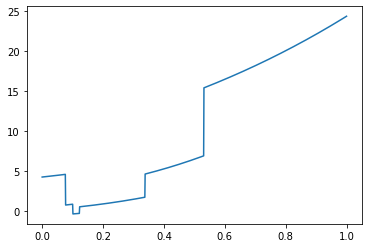

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.plot(my_domain.mesh, function.evaluate(my_domain.mesh)[1])
plt.show()

The randomly generated members of the PCb are piecewise continuous polynomials. The function_bank.py contains many more functions. Here are some examples:

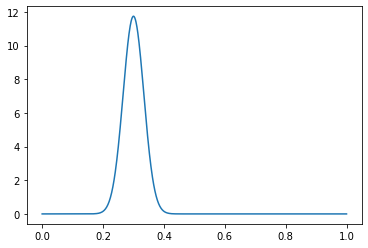

In [25]:
%matplotlib inline
gaussian = Gaussian_1D(domain=my_domain, center=0.3, width=0.2)

plt.plot(my_domain.mesh, gaussian.evaluate(my_domain.mesh)[1])
plt.show()

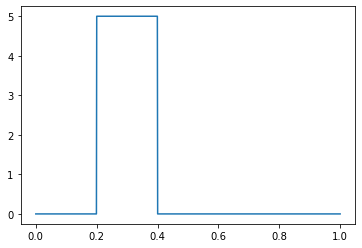

In [26]:
%matplotlib inline
boxcar = Boxcar_1D(domain=my_domain, center=0.3, width=0.2)

plt.plot(my_domain.mesh, boxcar.evaluate(my_domain.mesh)[1])
plt.show()

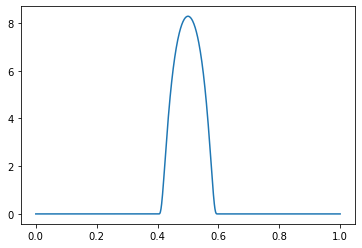

In [27]:
%matplotlib inline
bump = Bump_1D(domain=my_domain, center=0.5, width=0.2)

plt.plot(my_domain.mesh, bump.evaluate(my_domain.mesh)[1])
plt.show()

We can also add these functions as members to out space.

In [28]:
PCB.add_member(member_name='gaussian', member=gaussian)
PCB.add_member(member_name='boxcar', member=boxcar)
PCB.add_member(member_name='bump', member=bump)

print(PCB.members)

{'gaussian': <core.aux.functions.Gaussian_1D object at 0x7f17e4d0a190>, 'boxcar': <core.aux.functions.Boxcar_1D object at 0x7f188edf02d0>, 'bump': <core.aux.functions.Bump_1D object at 0x7f17e43a26d0>}


We can also take the inner product between two functions. By definitions this is:
$$
\begin{equation}
    \left< f, g \right>_{PC_b[[0,1]]} = \int_0^1 f(r) g(r) dr 
\end{equation}
$$

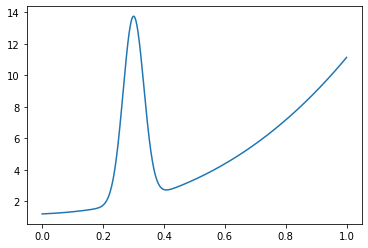

In [29]:
%matplotlib inline
new_func = Random_1D(my_domain, seed=2) + gaussian
plt.plot(my_domain.mesh, new_func.evaluate(my_domain.mesh)[1])
plt.show()